In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import exp, factorial
import copy, math

In [2]:
import time

"""
https://www.w3resource.com/python-exercises/python-basic-exercise-65.php
"""

def time_taken(start, end):
    """Human readable time between `start` and `end`

    :param start: time.time()
    :param end: time.time()
    :returns: day:hour:minute:second.millisecond
    """
    my_time = end-start
    day = my_time // (24 * 3600)
    my_time = my_time % (24 * 3600)
    hour = my_time // 3600
    my_time %= 3600
    minutes = my_time // 60
    my_time %= 60
    seconds = my_time
    milliseconds = ((end - start)-int(end - start))
    day_hour_min_sec = str('%02d' % int(day))+":"+str('%02d' % int(hour))+":"+str('%02d' % int(minutes))+":"+str('%02d' % int(seconds)+"."+str('%.3f' % milliseconds)[2:])
    return day_hour_min_sec


In [3]:
# maximum # of cars in each location
MAX_CARS = 20

# maximum # of cars to move during night
MAX_MOVE_OF_CARS = 5

# expectation for rental requests in first location
RENTAL_REQUEST_FIRST_LOC = 3

# expectation for rental requests in second location
RENTAL_REQUEST_SECOND_LOC = 4

# expectation for # of cars returned in first location
RETURNS_FIRST_LOC = 3

# expectation for # of cars returned in second location
RETURNS_SECOND_LOC = 2

DISCOUNT = 0.9

# credit earned by a car
RENTAL_CREDIT = 10

# cost of moving a car
MOVE_CAR_COST = 2

# additional cost for parking more than 10 cars
ADDITIONAL_PARKING_COST = 4

# all possible actions
"""
We can move 5 cars maximum over night
Moving cars from first location to second: 5 actions (positive numbers)
Moving cars from second location to first: 5 actions (negative numbers)
No moving any car: 0 action
So, there are 11 actions
"""
actions = np.arange(-MAX_MOVE_OF_CARS, MAX_MOVE_OF_CARS + 1)



In [4]:
# Probability for poisson distribution
# @lam: lambda should be less than 10 for this function
# poisson_cache = dict()
# def poisson(n, lam):
#     global poisson_cache
#     key = n * 10 + lam
#     if key not in poisson_cache.keys():
#         poisson_cache[key] = exp(-lam) * pow(lam, n) / factorial(n)
#     return poisson_cache[key]

#poisson_cache = dict()
"""
The probability distribution of a Poisson random variable X representing
the number of successes occurring in a given time interval
"""
def poisson(n, lam):
    return np.exp(-lam) * np.power(lam, n) / np.math.factorial(n)

# @state: [# of cars in first location, # of cars in second location]
# @action: positive if moving cars from first location to second location,
#          negative if moving cars from second location to first location
# @stateValue: state value matrix
# @constant_returned_cars:  if set True, model is simplified such that
#   the # of cars returned in daytime becomes constant
#   rather than a random value from poisson distribution, which will reduce calculation time
#   and leave the optimal policy/value state matrix almost the same
def expected_return(state, action, state_value, exercise_4_5=False):
    # initailize total return
    returns = 0.0
    
    if exercise_4_5 == True:
        """
        If more than one car is needed to be taken from 1st to 2nd location
        Jack’s employees can take for free
        Positive action means moving cars from first location to second
        
        Cost = number of cars moved x cost to move one car
        Substracted from total returns
        """
        if action > 1:
            returns -= MOVE_CAR_COST * abs(action-1)
        else:
            returns -= MOVE_CAR_COST * abs(action)
        """
        If more than 10 cars are kept overnight at a location, 
        additional cost of $4 must be charged
        """
        if (state[0] > 10):
            returns -= ADDITIONAL_PARKING_COST
            
        if (state[1] > 10):
            returns -= ADDITIONAL_PARKING_COST
    else:
        returns -= MOVE_CAR_COST * abs(action)
    
    # go through all possible rental requests
    """
    Looping for all possible n values
    """
    for rental_request_first_loc in range(0, POISSON_UPPER_BOUND):
        for rental_request_second_loc in range(0, POISSON_UPPER_BOUND):
            # moving cars
            """
            Number of cars available for rent
            """
            num_of_cars_first_loc = int(min(state[0] - action, MAX_CARS))
            num_of_cars_second_loc = int(min(state[1] + action, MAX_CARS))
                        
            # valid rental requests should be less than actual # of cars
            """
            Number of cars requested should be less than number of cars available
            """
            real_rental_first_loc = min(num_of_cars_first_loc, rental_request_first_loc)
            real_rental_second_loc = min(num_of_cars_second_loc, rental_request_second_loc)

            # get credits for renting
            """
            Total Rent = number of cars rented x renting cost of one car
            """
            reward = (real_rental_first_loc + real_rental_second_loc) * RENTAL_CREDIT
            """
            Number of cars at the locations left after request
            """
            num_of_cars_first_loc -= real_rental_first_loc
            num_of_cars_second_loc -= real_rental_second_loc
            
            # probability for current combination of rental requests
            """
            probability of rental requests
            """
            prob = poisson(rental_request_first_loc, RENTAL_REQUEST_FIRST_LOC) * \
                         poisson(rental_request_second_loc, RENTAL_REQUEST_SECOND_LOC)
            
            # get returned cars, those cars can be used for renting tomorrow
            returned_cars_first_loc = RETURNS_FIRST_LOC
            returned_cars_second_loc = RETURNS_SECOND_LOC
            
            """
            Number of cars at the locations left after return
            min because it can't be more than max cars allowed
            """
            num_of_cars_first_loc = min(num_of_cars_first_loc + RETURNS_FIRST_LOC, MAX_CARS)
            num_of_cars_second_loc = min(num_of_cars_second_loc + RETURNS_SECOND_LOC, MAX_CARS)
            
            """
            New values = probability [reward + discount * old values]
            """
            returns += prob * (reward + DISCOUNT * state_value[num_of_cars_first_loc, num_of_cars_second_loc])

    return returns

iterations no:  0


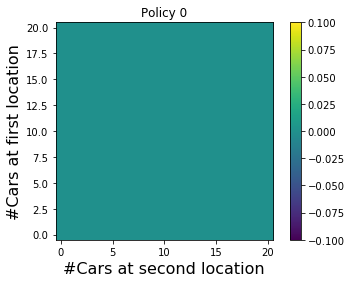

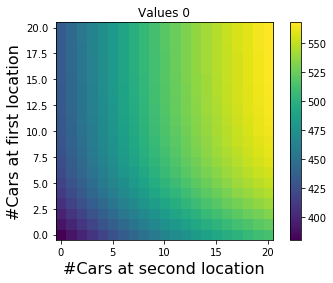

Number of policy changed:  331
iterations no:  1


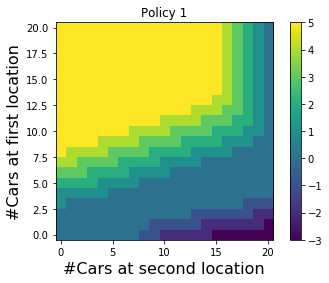

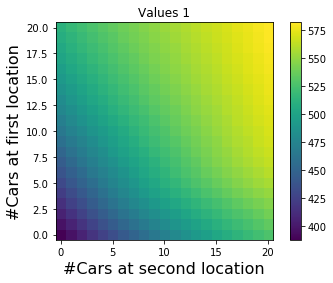

Number of policy changed:  286
iterations no:  2


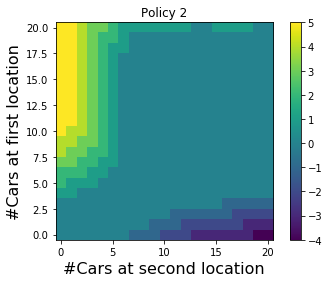

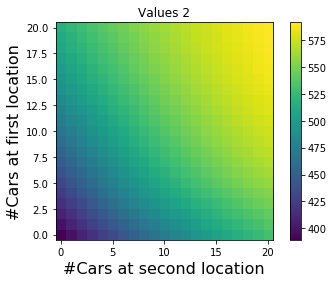

Number of policy changed:  80
iterations no:  3


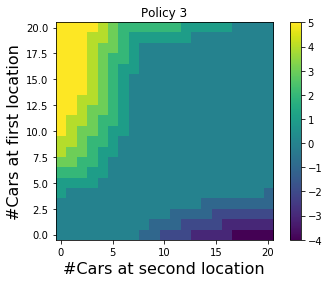

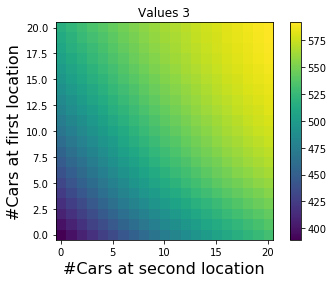

Number of policy changed:  12
iterations no:  4


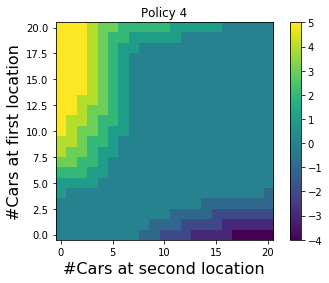

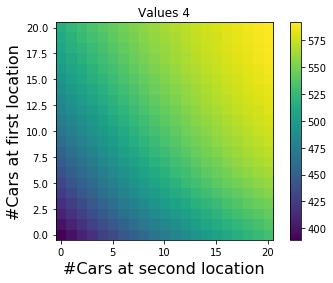

Number of policy changed:  0
Optimal policy reached!
day, hour, minute, second.millisecond-> 00:00:03:36.431


In [5]:

"""
Initialization

State is the number of cars at each location at the end of the day.
There can be 20 cars max at each location
So, there are 21 * 21 = 441 states including having no cars.
"""

value = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
policy = np.zeros((MAX_CARS + 1, MAX_CARS + 1))

#print(value.shape)
#print(policy.shape)

# An up bound for poisson distribution
# If n is greater than this value, then the probability of getting n is truncated to 0
"""
Possible values of n
3 for first location
4 for second location
"""
POISSON_UPPER_BOUND = 10 #7

iterations = 0
#exercise_4_5 = True
exercise_4_5 = False

SMALL_CHANGE = 0.001 #0.1 #0.01

start_time = time.time()

while True:
    print("iterations no: ", iterations)
    
    plt.imshow(policy)
    plt.title("Policy "+str(iterations))
    plt.xlabel("#Cars at second location", fontsize=16)
    plt.ylabel("#Cars at first location", fontsize=16)
    plt.gca().invert_yaxis()
    plt.colorbar()
    # plt.savefig("Policy "+str(iterations)+".png", bbox_inches='tight', dpi=100) #remove white space and save image
    plt.show()
    
    """
    Policy evaluation
    """
    while True:
        new_value = copy.deepcopy(value)

        """
        Looping for each states
        """
        for i in range(MAX_CARS + 1):
            for j in range(MAX_CARS + 1):
                new_value[i, j] = expected_return([i, j], policy[i, j], new_value, exercise_4_5)

        value_change = np.sum(np.abs((new_value - value))) # Taking absolute values to find changes
        #print('value change: ', value_change)
        value = new_value
        if value_change < SMALL_CHANGE:
            break
            
    plt.imshow(value)
    plt.title("Values "+str(iterations))
    plt.xlabel("#Cars at second location", fontsize=16)
    plt.ylabel("#Cars at first location", fontsize=16)
    plt.gca().invert_yaxis()
    plt.colorbar()
    # plt.savefig("Values "+str(iterations)+".png", bbox_inches='tight', dpi=100) #remove white space and save image
    plt.show()
        
        
    """    
    Policy improvement
    """
    new_policy = copy.deepcopy(policy)

    """
    Looping for each states
    """
    for i in range(MAX_CARS + 1):
        for j in range(MAX_CARS + 1):
            action_returns = []
            """
            For each action
            """
            for action in actions:
                # action >= 0: cars from first location to second
                # i >= action: make sure that first location has enough cars
                if (action >= 0 and i >= action):
                    action_returns.append(expected_return([i, j], action, value, exercise_4_5))
                # action < 0: cars from second location to first
                # j >= action: make sure that second location has enough cars
                elif (action < 0 and j >= abs(action)):
                    action_returns.append(expected_return([i, j], action, value, exercise_4_5))
                else:
                    """
                    new_policy was initialized with 0 action, so changing that to least possible value
                    because argmax would not output it
                    """
                    action_returns.append(-math.inf)
            """
            Selecting the action greedily for new policy
            """
            new_policy[i, j] = actions[np.argmax(action_returns)]
    
    
    policy_change = np.sum((new_policy != policy))

    print("Number of policy changed: ", policy_change)

    policy = new_policy
    
    if policy_change == 0:
        print("Optimal policy reached!")
        break
    
    iterations += 1

end_time = time.time()
print("day, hour, minute, second.millisecond->", time_taken(start_time, end_time))